Machine Learning Module Assignment - Credit Card Fraud Detection

Problem Statement : 

Dataset Link : https://drive.google.com/drive/folders/1TemeLlJmnrYasZ19RklpvmnXlhLDBarT?usp=share_link


What Kind Of Approach You Could Follow for your Problem Statements :

Reading the Data, Understanding the Data, Exploratory Data Analysis, Data Visualization, Splitting the Data, Training and Testing, Modeling, Accuracy

Hints provided are only for your references or getting started. You’re free to use your own methodology to work on your assignments.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('fraudTrain.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
df.shape

(1296675, 23)

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [8]:
df.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

<Axes: xlabel='is_fraud', ylabel='count'>

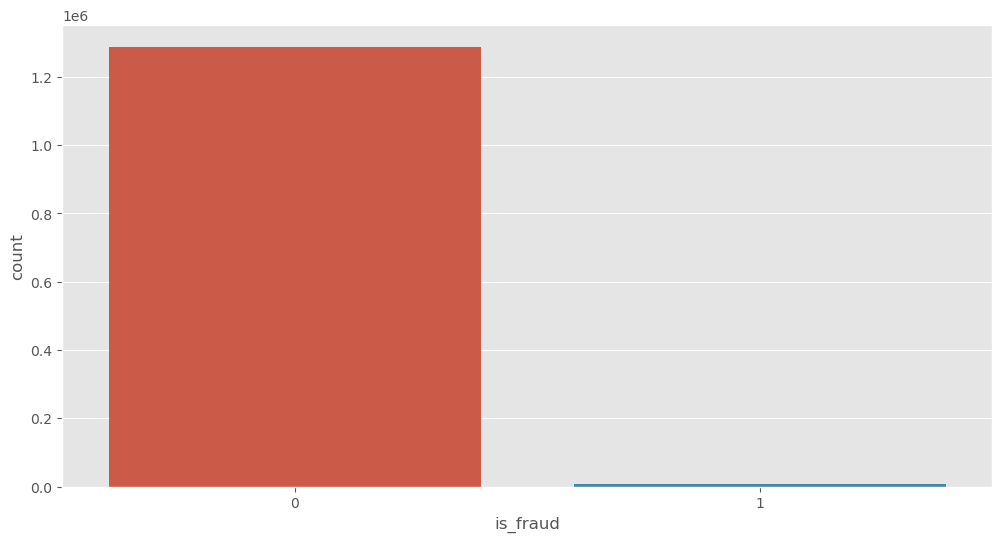

In [9]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'is_fraud', data = df )

<Axes: xlabel='is_fraud', ylabel='state'>

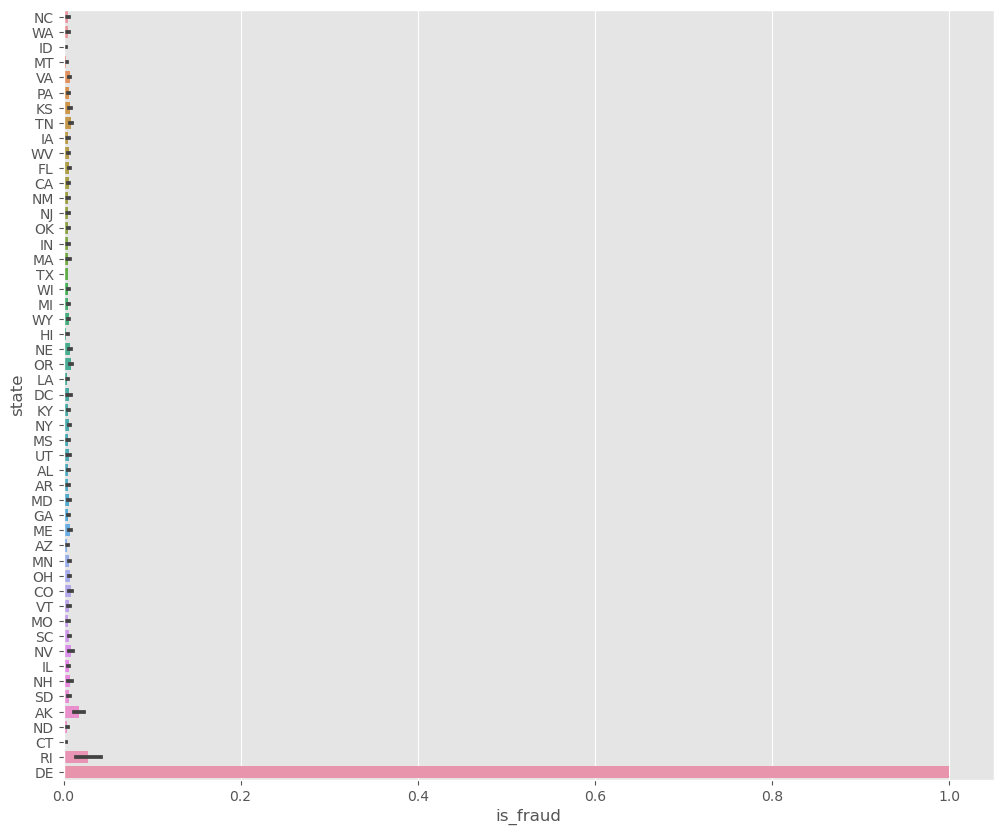

In [10]:
plt.figure(figsize = (12,10))
sns.barplot(x = 'is_fraud',y = 'state',  data = df )

<Axes: xlabel='is_fraud', ylabel='category'>

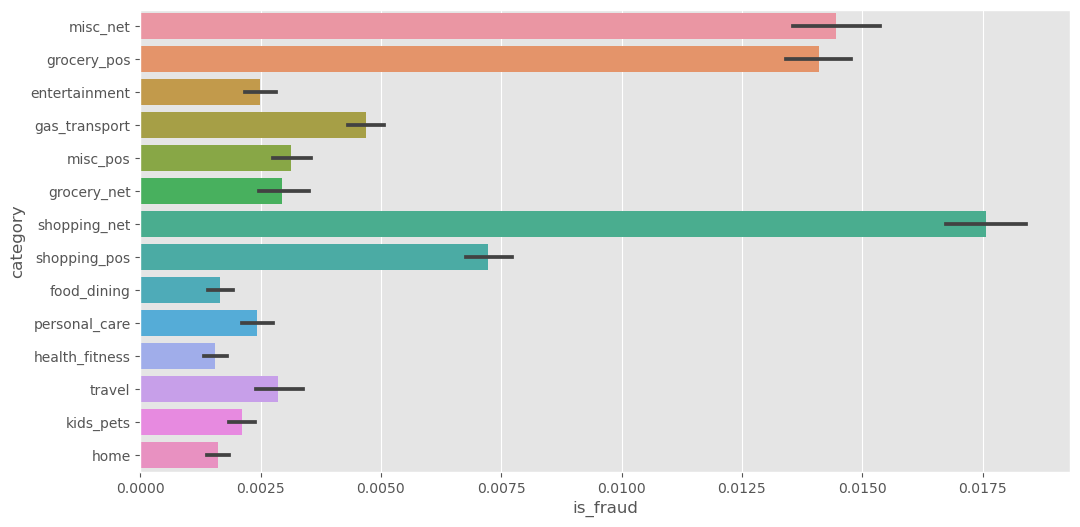

In [11]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'is_fraud',y = 'category', data = df )

In [12]:
df.groupby('merchant')['is_fraud'].mean().sort_values(ascending = False)

merchant
fraud_Kozey-Boehm                        0.025723
fraud_Herman, Treutel and Dickens        0.025385
fraud_Kerluke-Abshire                    0.022307
fraud_Brown PLC                          0.022109
fraud_Goyette Inc                        0.021616
                                           ...   
fraud_Osinski Inc                        0.000000
fraud_Hodkiewicz, Prohaska and Paucek    0.000000
fraud_Schroeder, Wolff and Hermiston     0.000000
fraud_Gulgowski LLC                      0.000000
fraud_Schroeder Group                    0.000000
Name: is_fraud, Length: 693, dtype: float64

<Axes: xlabel='is_fraud', ylabel='merchant'>

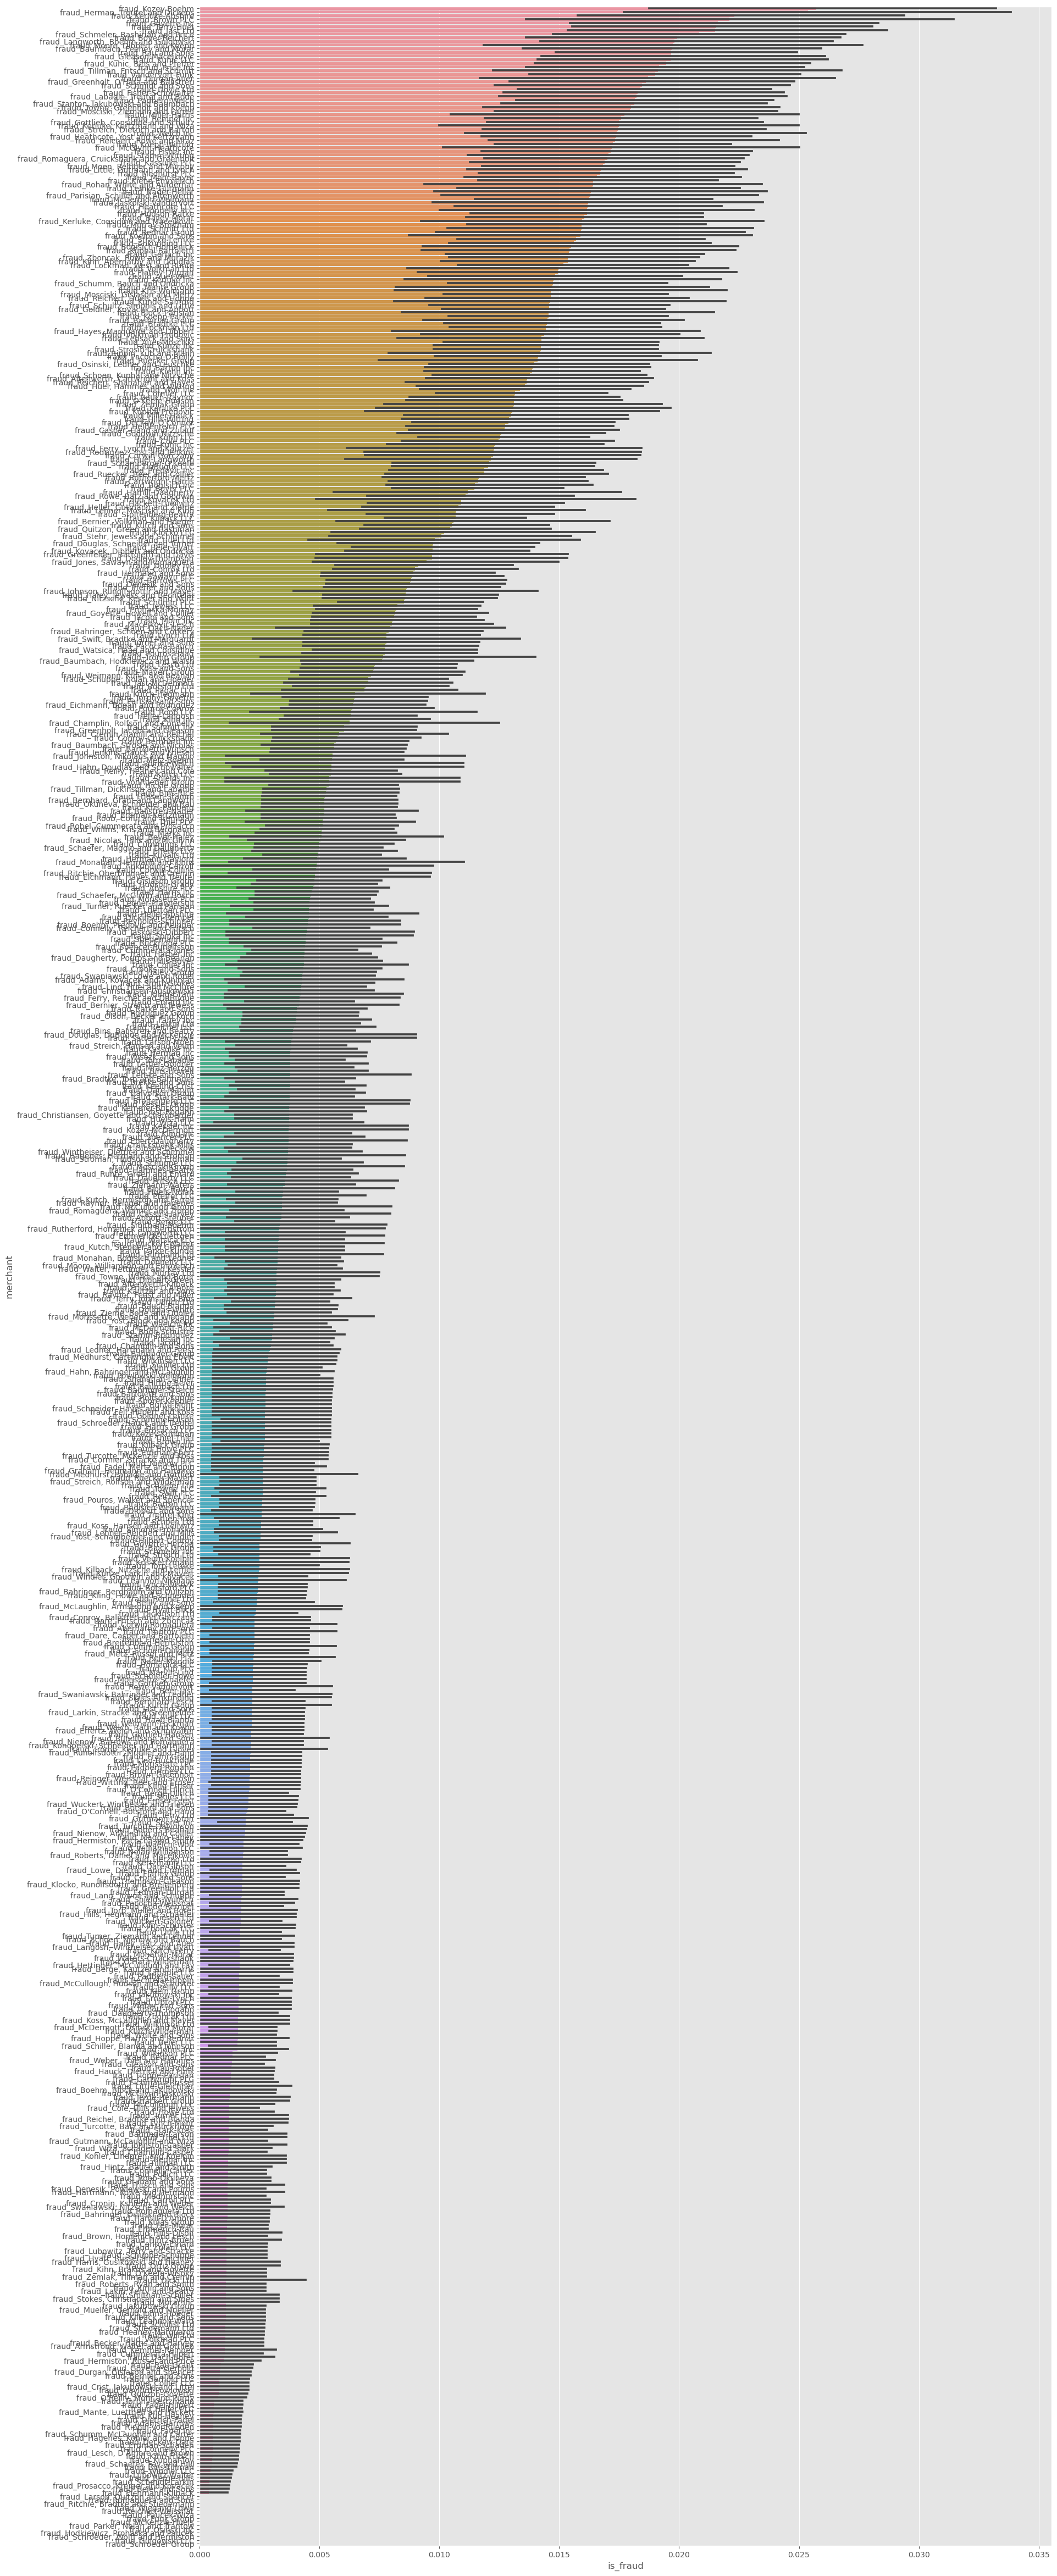

In [13]:
desc_order = df.groupby('merchant')['is_fraud'].mean().sort_values(ascending = False).index
plt.figure(figsize = (20,60))
sns.barplot(x = 'is_fraud',y = 'merchant', data = df , order = desc_order )

In [14]:
X = df.drop(columns = ['trans_date_trans_time','is_fraud','first','last','dob', 'job', 'trans_num'])
Y = df[['is_fraud']]  

In [15]:
df.head(4)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0


In [16]:
X.head(3)

,Unnamed: 0,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481


In [17]:
X.shape

(1296675, 16)

In [18]:
Y.head(2)

,is_fraud
0,0
1,0


In [19]:
Y.shape

(1296675, 1)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.025, random_state = 48)

In [21]:
print('Tranning Data shape :',x_train.shape)
print('Testing Data shape  :',x_test.shape)
print('Trainnning Lable shape :',y_train.shape)
print('Testing Lable shape    :',y_test.shape)

Tranning Data shape : (1264258, 16)
Testing Data shape  : (32417, 16)
Trainnning Lable shape : (1264258, 1)
Testing Lable shape    : (32417, 1)


- Unnamed: 0: Index or ID of the transaction.
- trans_date_trans_time: Date and time of the transaction.
- cc_num: Credit card number used for the transaction.
- merchant: Name of the merchant where the transaction occurred.
- category: Category of the transaction (e.g., grocery, - entertainment, etc.).
- amt: Transaction amount.
- first: First name of the customer.
- last: Last name of the customer.
- gender: Gender of the customer.
- street: Street address of the customer.
- city: City of the customer.
- state: State of the customer.
- zip: Zip code of the customer.
- lat: Latitude of the customer's location.
- long: Longitude of the customer's location.
- city_pop: Population of the city where the customer resides.
- job: Occupation or job title of the customer.
- dob: Date of birth of the customer.
- trans_num: Transaction number or ID.
- unix_time: Unix timestamp of the transaction.
- merch_lat: Latitude of the merchant's location.
- merch_long: Longitude of the merchant's location.
- is_fraud: Indicator variable indicating whether the transaction is fraudulent (0 for non-fraudulent, 1 for fraudulent).

In [22]:
# skelling
# col = ['amt','lat','long','city_pop','unix_time','merch_lat','merch_long']
col = ['cc_num','amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train[col])

x_train[col] = scaler.transform(x_train[col])
x_test[col] = scaler.transform(x_test[col])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [24]:
# encoding
col = ['merchant','category','gender','street','city','state']
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
encoder.fit(x_train[col])

x_train[col] = encoder.transform(x_train[col])
x_test[col] = encoder.transform(x_test[col])

In [25]:
x_train.head()

,Unnamed: 0,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
1125034,1125034,0.000075,164.0,6.0,0.002761,1.0,202.0,58.0,43.0,0.772994,0.202543,0.713291,0.000837,0.871760,0.213588,0.711806
958463,958463,0.000074,664.0,3.0,0.002580,0.0,305.0,97.0,38.0,0.180155,0.430479,0.929358,0.007260,0.717135,0.424012,0.922386
298555,298555,0.000871,329.0,4.0,0.003059,1.0,858.0,108.0,48.0,0.539563,0.539489,0.784613,0.000364,0.272173,0.537072,0.774447
709224,709224,0.000701,266.0,0.0,0.001338,0.0,77.0,644.0,3.0,0.850831,0.295469,0.548005,0.451684,0.563098,0.301270,0.555134
142712,142712,0.000007,133.0,0.0,0.000496,1.0,837.0,424.0,9.0,0.330390,0.174625,0.856646,0.081626,0.144072,0.192687,0.841790


In [26]:
x_test.head()

,Unnamed: 0,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
1062415,1062415,0.000076,38.0,7.0,0.002926,0.0,723.0,623.0,3.0,0.852526,0.289766,0.549680,0.005857,0.820280,0.287665,0.551615
784821,784821,0.000708,117.0,2.0,0.001717,1.0,850.0,389.0,40.0,0.286199,0.274473,0.878519,0.007037,0.623634,0.284195,0.880677
463688,463688,0.001074,684.0,10.0,0.001101,1.0,181.0,62.0,26.0,0.593315,0.551856,0.557995,0.006247,0.380582,0.542558,0.548291
121436,121436,0.000705,666.0,0.0,0.001754,1.0,869.0,515.0,44.0,0.845208,0.397303,0.574540,0.003354,0.127621,0.392431,0.569262
982085,982085,0.000862,563.0,4.0,0.004281,1.0,399.0,65.0,12.0,0.498995,0.489091,0.737319,0.001035,0.742895,0.476025,0.738781


In [27]:
x_train.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1264258 entries, 1125034 to 920115
Data columns (total 16 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1264258 non-null  int64  
 1   cc_num      1264258 non-null  float64
 2   merchant    1264258 non-null  float64
 3   category    1264258 non-null  float64
 4   amt         1264258 non-null  float64
 5   gender      1264258 non-null  float64
 6   street      1264258 non-null  float64
 7   city        1264258 non-null  float64
 8   state       1264258 non-null  float64
 9   zip         1264258 non-null  float64
 10  lat         1264258 non-null  float64
 11  long        1264258 non-null  float64
 12  city_pop    1264258 non-null  float64
 13  unix_time   1264258 non-null  float64
 14  merch_lat   1264258 non-null  float64
 15  merch_long  1264258 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 164.0 MB


In [28]:
x_test.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32417 entries, 1062415 to 129741
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32417 non-null  int64  
 1   cc_num      32417 non-null  float64
 2   merchant    32417 non-null  float64
 3   category    32417 non-null  float64
 4   amt         32417 non-null  float64
 5   gender      32417 non-null  float64
 6   street      32417 non-null  float64
 7   city        32417 non-null  float64
 8   state       32417 non-null  float64
 9   zip         32417 non-null  float64
 10  lat         32417 non-null  float64
 11  long        32417 non-null  float64
 12  city_pop    32417 non-null  float64
 13  unix_time   32417 non-null  float64
 14  merch_lat   32417 non-null  float64
 15  merch_long  32417 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 4.2 MB


In [29]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [30]:
from sklearn.metrics import accuracy_score, f1_score
pred_train = classifier.predict(x_train)
pred_test = classifier.predict(x_test)

print('Tranning accuracy :', accuracy_score(y_train, pred_train))
print('Testing accuracy :', accuracy_score(y_test, pred_test))

Tranning accuracy : 0.9942203252817068
Testing accuracy : 0.9938612456427183
